Aplicación de Técnicas de Recomendación para Mejorar la Venta en el Retail de Vehículos de Juguete

Integrantes: -Felipe Caro

-Martín Garrido
             
-Bruno Vilches

Grupo: 5

Saving Clientes.csv to Clientes (5).csv


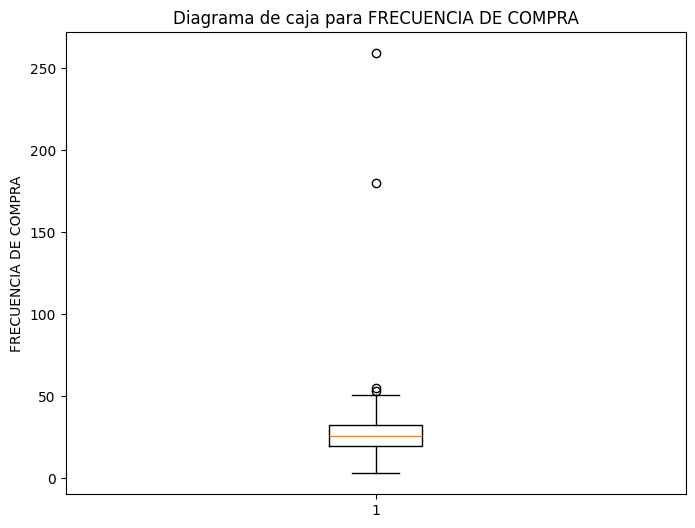

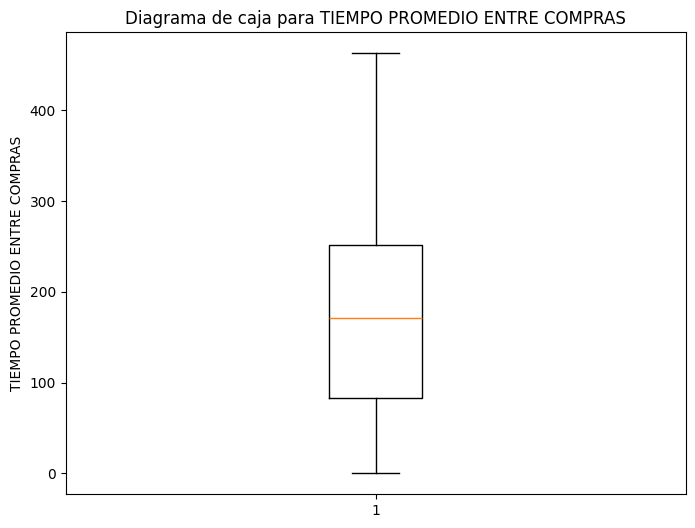

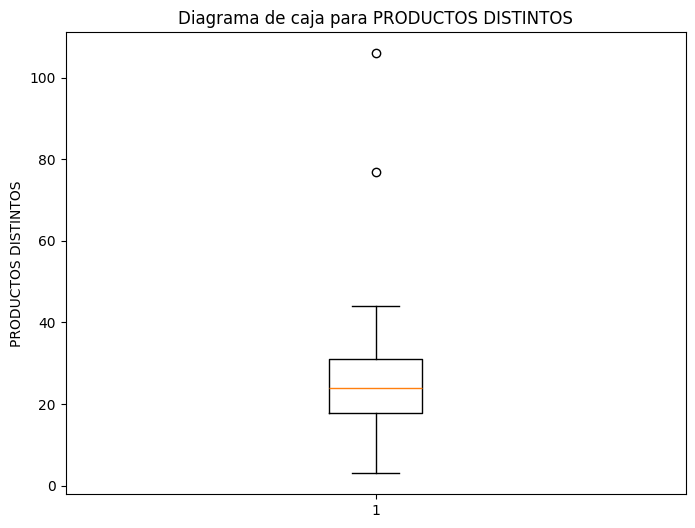

In [ ]:
import matplotlib.pyplot as plt #Importa la biblioteca Matplotlib para la creación de gráficos
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

mydata = pd.read_csv('Clientes.csv')

numerical_cols = mydata.select_dtypes(include=np.number).columns

for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(mydata[col].dropna())
  plt.title(f"Diagrama de caja para {col}")
  plt.ylabel(col)
  plt.show()


Crea diagramas de caja de bigotes (Box plot) para cada columna numérica en los datos para visualizar la distribución y los valores atípicos.

In [ ]:
print('**Missing values check**')
print(mydata.isnull().sum())

**Missing values check**
CLIENTE                          0
FRECUENCIA DE COMPRA             0
TOTAL DE SALES                   0
SALES PROMEDIO                   0
CATEGORÍA FAVORITA               0
CANTIDAD PROMEDIO                0
CIUDAD                           0
PAÍS                             0
MODA 1                           0
MODA 2                           0
MODA 3                           0
TIEMPO PROMEDIO ENTRE COMPRAS    0
PRODUCTOS DISTINTOS              0
dtype: int64


Imprime la cantidad de valores faltantes en cada columna de la base de datos.

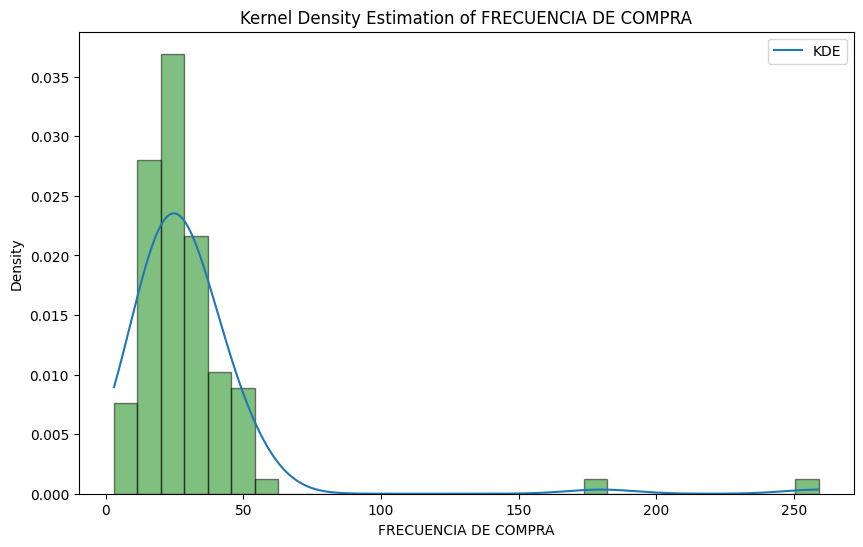

In [ ]:
from scipy.stats import gaussian_kde # Importa la función gaussian_kde de la biblioteca scipy.stats


kde = gaussian_kde(mydata['FRECUENCIA DE COMPRA']) # Crea un objeto KDE utilizando los datos de la columna 'FRECUENCIA DE COMPRA' de la base de datos mydata.
x = np.linspace(min(mydata['FRECUENCIA DE COMPRA']), max(mydata['FRECUENCIA DE COMPRA']), 1000) # np.linspace crea 1000 puntos espaciados uniformemente entre el valor mínimo y máximo de 'FRECUENCIA DE COMPRA'.
# Calcula la estimación de la densidad de probabilidad (PDF) para cada valor en el rango x utilizando el objeto KDE.
# Esto genera los valores de densidad que se usarán para trazar la curva KDE.
kde_pdf = kde(x)

plt.figure(figsize=(10, 6)) # Crea una nueva figura para el gráfico con un tamaño específico
plt.plot(x, kde_pdf, label='KDE') # Traza la curva KDE utilizando los valores x y kde_pdf calculados anteriormente.
plt.hist(mydata['FRECUENCIA DE COMPRA'], bins=30, density=True, alpha=0.5, color='g', edgecolor='black') # Superpone un histograma de los datos de 'FRECUENCIA DE COMPRA' en el mismo gráfico.
plt.title('Kernel Density Estimation of FRECUENCIA DE COMPRA') # Agrega un título al gráfico.
plt.xlabel('FRECUENCIA DE COMPRA') # Agrega una etiqueta al eje x.
plt.ylabel('Density') # Agrega una etiqueta al eje y.
plt.legend() # Muestra la leyenda del gráfico.
plt.show() # Muestra el gráfico.


Estima y visualiza la función de densidad de probabilidad de la columna 'FRECUENCIA DE COMPRA' utilizando la estimación de densidad de kernel (KDE).

Resultados:

Se observa cómo la mayoría de los ingresos son relacionados tanto a los “Classic Cars” como a “Motorcycles”, y normalmente, las personas compran con más frecuencia este tipo de productos, esto puede ser debido a las tendencias del mercado donde estos productos toman más relevancia

Index(['CLIENTE', 'FRECUENCIA DE COMPRA', 'TOTAL DE SALES', 'SALES PROMEDIO',
       'CATEGORÍA FAVORITA', 'CANTIDAD PROMEDIO', 'CIUDAD', 'PAÍS', 'MODA 1',
       'MODA 2', 'MODA 3', 'TIEMPO PROMEDIO ENTRE COMPRAS',
       'PRODUCTOS DISTINTOS'],
      dtype='object')


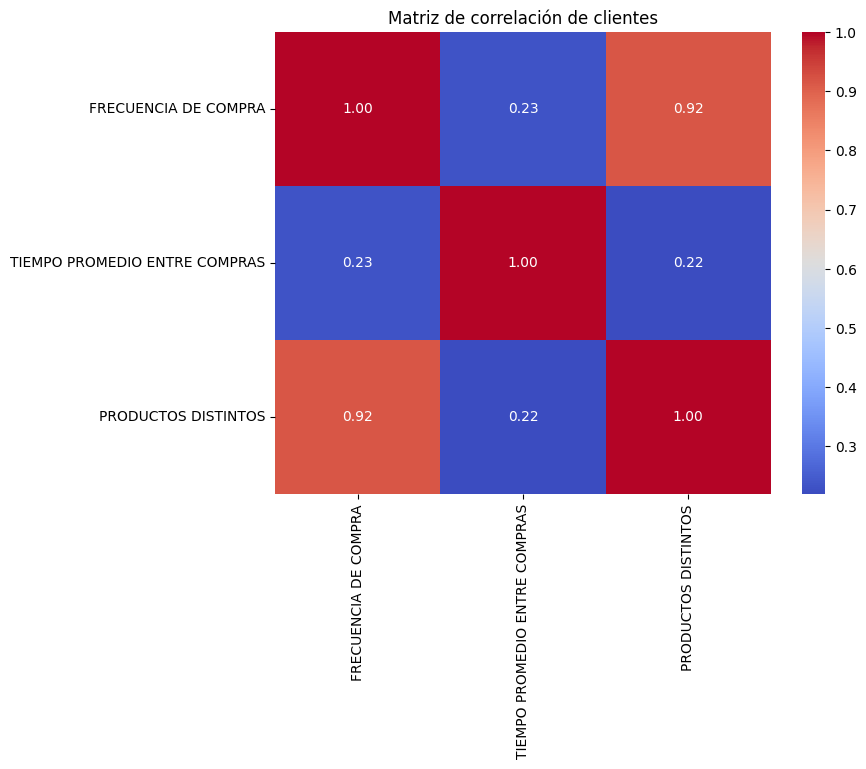

In [ ]:
import seaborn as sns # Importa la biblioteca seaborn, que usaremos para visualizar la matriz de correlación.

print(mydata.columns) # Imprime los nombres de las columnas del DataFrame 'mydata'.

# Selecciona solo las columnas numéricas del DataFrame 'mydata' y las guarda en un nuevo DataFrame llamado 'numeric_data'.
# Esto asegura que solo se consideren las variables numéricas para el cálculo de la correlación.
numeric_data = mydata.select_dtypes(include=['number'])
# Calcula la matriz de correlación entre todas las columnas numéricas en 'numeric_data'.
# El método .corr() de pandas calcula la correlación de Pearson por defecto, que mide la relación lineal entre dos variables.
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6)) # Crea una nueva figura para el gráfico con un tamaño específico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Crea un mapa de calor (heatmap) utilizando seaborn para visualizar la matriz de correlación.
plt.title('Matriz de correlación de clientes') # Agrega un título al gráfico.
plt.show() # Muestra el gráfico.

Este código ayuda a visualizar las relaciones entre diferentes variables numéricas en tus datos de clientes. El mapa de calor muestra qué variables tienden a aumentar o disminuir juntas, lo cual puede ser muy útil para entender patrones en tus datos y para la toma de decisiones.

Resultados:

Se observa como existe una correlación entre productos distintos y la frecuencia de compra, esto significa que los clientes presentan poca fidelidad con un producto en cuestión y se prefiere comprar distintos productos.

Saving Dataset_EII4220_FelipeCaro_MartinGarrido_BrunoVilches (2).xlsx to Dataset_EII4220_FelipeCaro_MartinGarrido_BrunoVilches (2) (4).xlsx


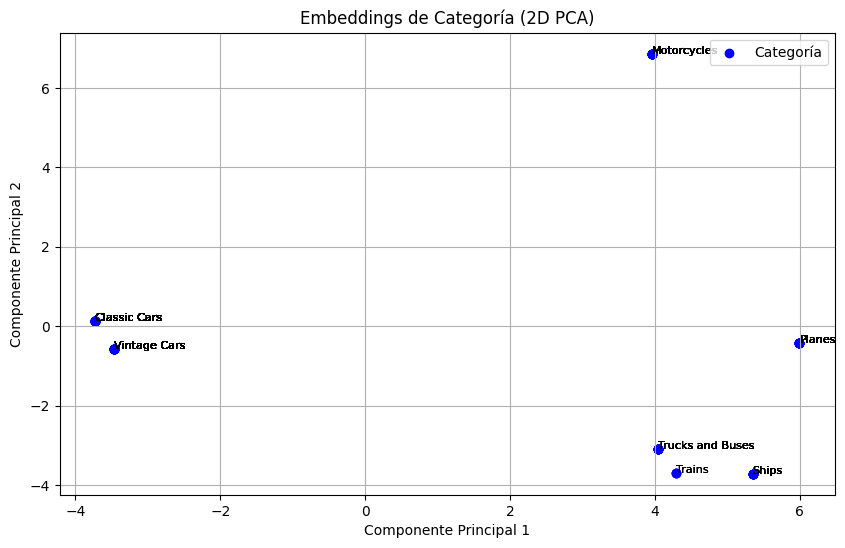

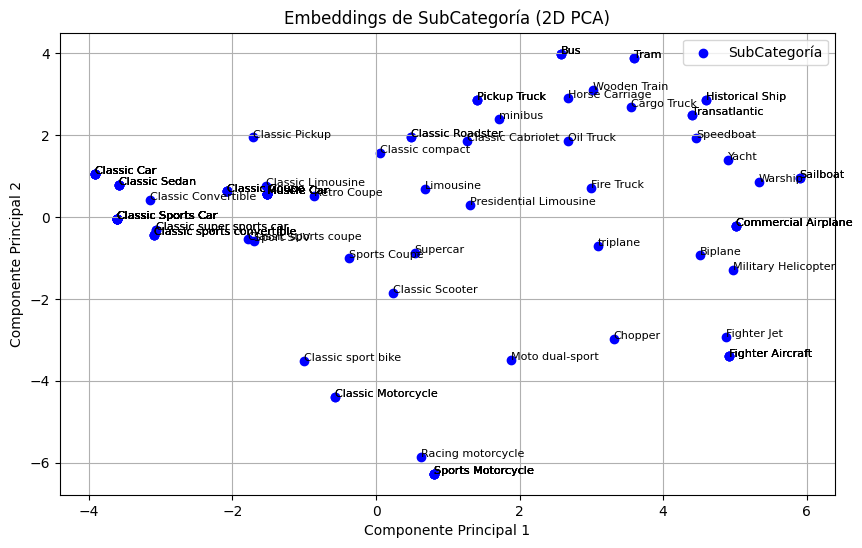

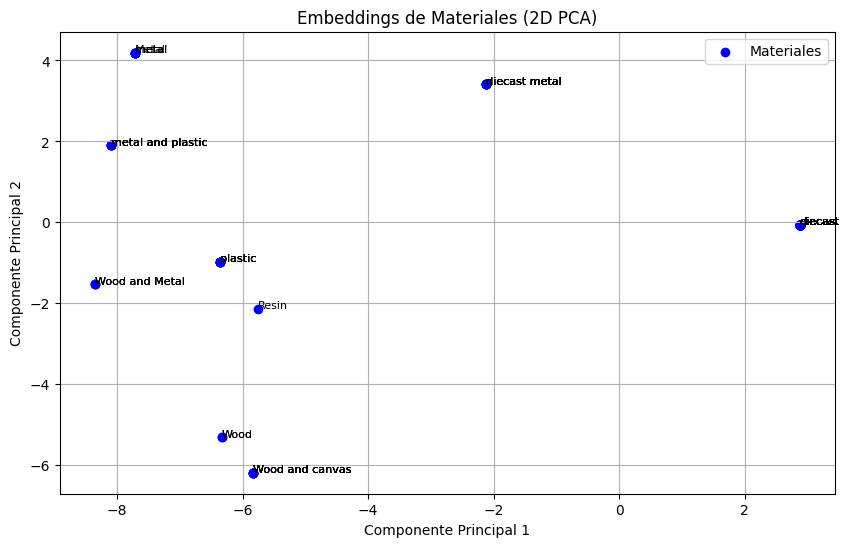

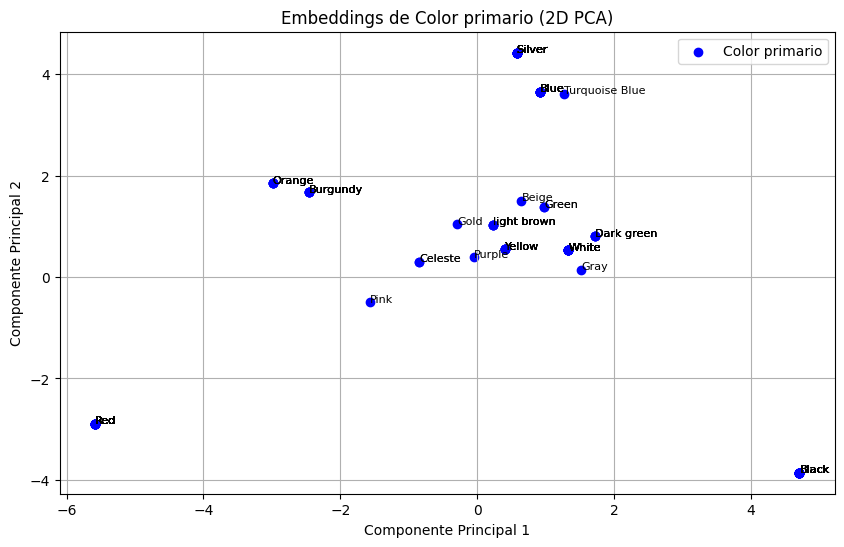

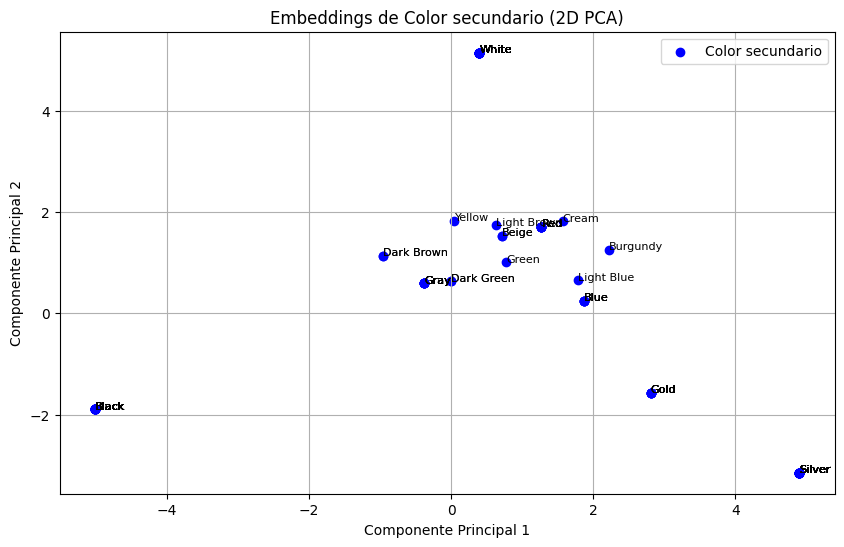

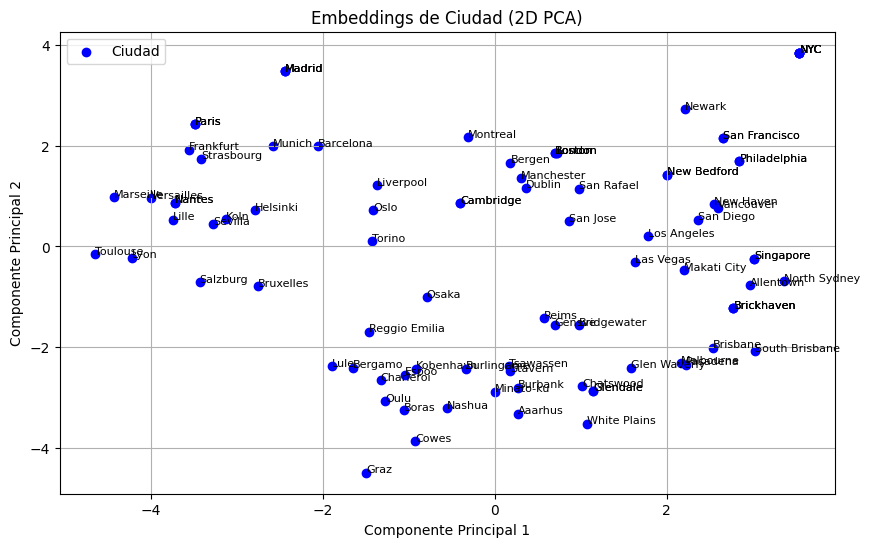

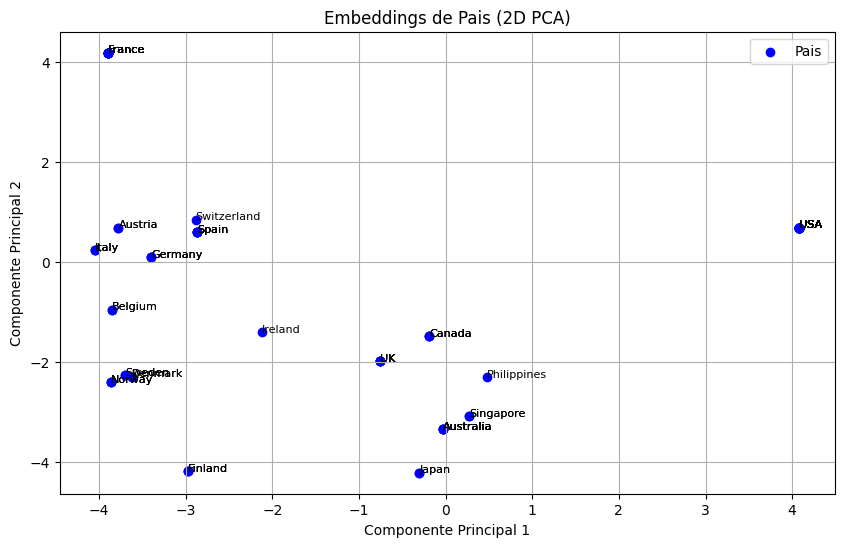

In [ ]:
from sentence_transformers import SentenceTransformer #Importa la biblioteca para generar embeddings de texto
from sklearn.decomposition import PCA #Importa PCA para la reducción de dimensionalidad

uploaded = files.upload()

hojas = pd.read_excel('Dataset_EII4220_FelipeCaro_MartinGarrido_BrunoVilches.xlsx', sheet_name=None)  # Lee todas las hojas del archivo Excel en un diccionario llamado 'hojas'.

hoja_producto = hojas['Producto'] # Obtiene la hoja 'Producto' del diccionario 'hojas' y la asigna a la variable 'hoja_producto'.
hoja_cliente = hojas['Cliente'] # Obtiene la hoja 'Cliente' del diccionario 'hojas' y la asigna a la variable 'hoja_cliente'.


model = SentenceTransformer('paraphrase-MiniLM-L6-v2') #Carga un modelo preentrenado de SentenceTransformer

def generar_y_graficar_embeddings(df, columna, nombre_columna): # Define una función llamada 'generar_y_graficar_embeddings' que genera embeddings, reduce la dimensionalidad y los grafica.
    embeddings = model.encode(df[columna].astype(str).tolist()) # Genera embeddings de texto para la columna especificada utilizando el modelo SentenceTransformer.

    pca = PCA(n_components=2)  # Crea un objeto PCA para reducir la dimensionalidad a 2 componentes principales.
    embeddings_2d = pca.fit_transform(embeddings) # Aplica PCA a los embeddings para obtener una representación en 2D.

    plt.figure(figsize=(10, 6)) # Crea una nueva figura para el gráfico.
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue', label=nombre_columna) # Crea un gráfico de dispersión de los embeddings en 2D.

# el resto del codigo sirve para la visualización
    for i, txt in enumerate(df[columna]):
        plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8)

    plt.title(f'Embeddings de {nombre_columna} (2D PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.grid(True)
    plt.show()

generar_y_graficar_embeddings(hoja_producto, 'Categoría', 'Categoría')
generar_y_graficar_embeddings(hoja_producto, 'SubCategoria', 'SubCategoría')
generar_y_graficar_embeddings(hoja_producto, 'Materiales', 'Materiales')
generar_y_graficar_embeddings(hoja_producto, 'Color primario', 'Color primario')
generar_y_graficar_embeddings(hoja_producto, 'Color secundario', 'Color secundario')

generar_y_graficar_embeddings(hoja_cliente, 'Ciudad', 'Ciudad')
generar_y_graficar_embeddings(hoja_cliente, 'Pais', 'Pais')

 Este código toma datos de texto de las hojas "Producto" y "Cliente" de un archivo Excel, los convierte en una representación numérica (embeddings) usando un modelo de inteligencia artificial, y luego reduce la dimensionalidad de estos embeddings para poder visualizarlos en un gráfico de dispersión. Esto permite analizar la similitud semántica entre los diferentes elementos de texto en las columnas especificadas.

 Una vez realizados, evaluamos su efectividad de forma visual, para ello reducimos la dimensionalidad de estos embeddings a dos componentes principales utilizando PCA, lo que nos permite visualizarlos en 2D, para observar cómo se agrupan los objetos.

Resultados:

Se observa claramente la agrupación de los datos según sus significados. En este caso, utilizamos subcategorías, lo cual tiene sentido, ya que, por ejemplo, se puede ver cómo todos los autos se agruparon, dejando los más cercanos a aquellos que son similares.




Análisis de Producto:


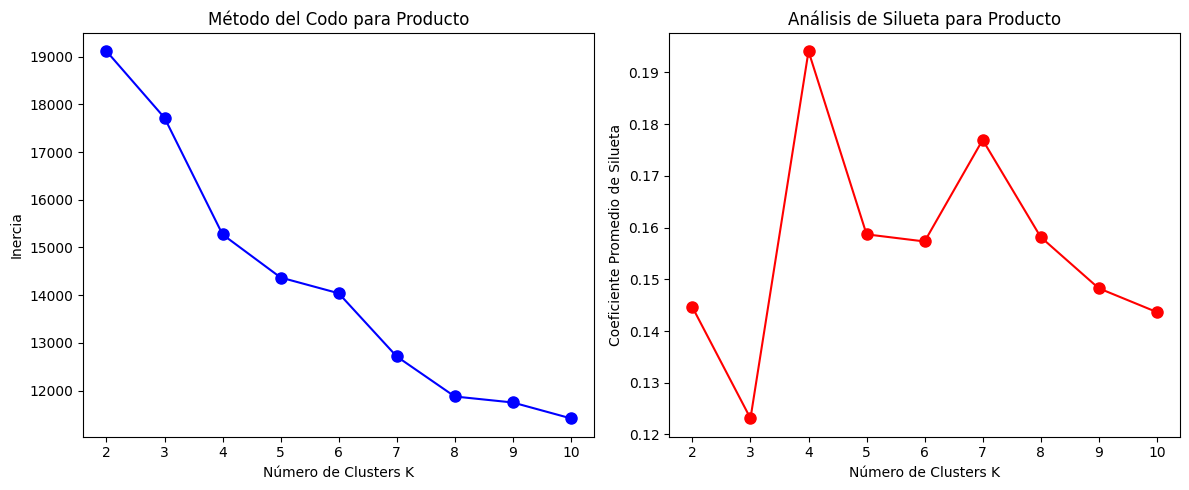

Visualización de Clusters para Producto:


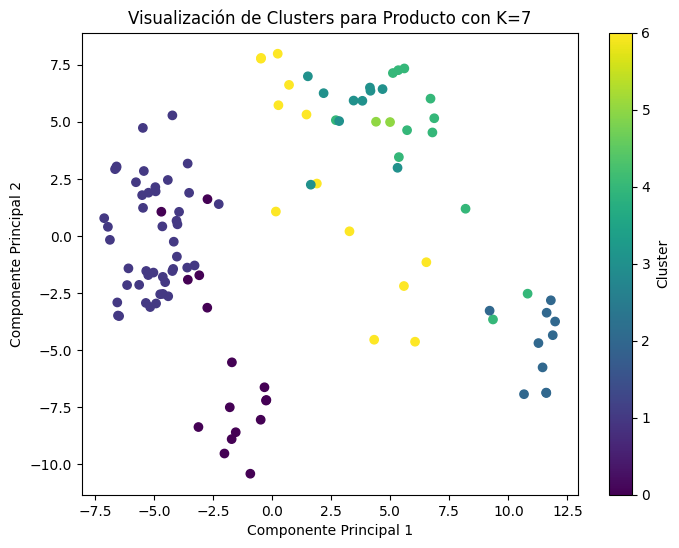

Análisis de Cliente:


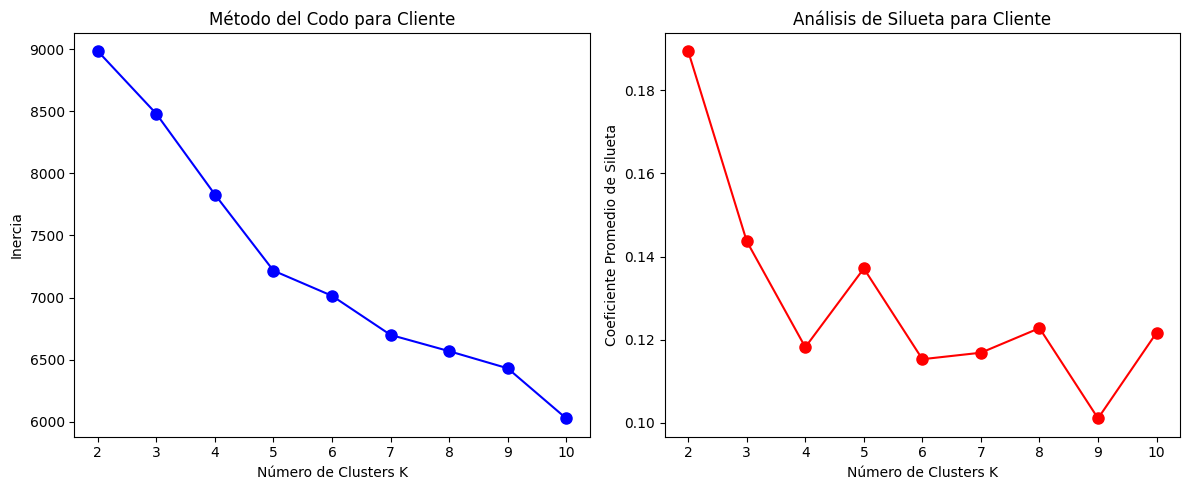

Visualización de Clusters para Cliente:


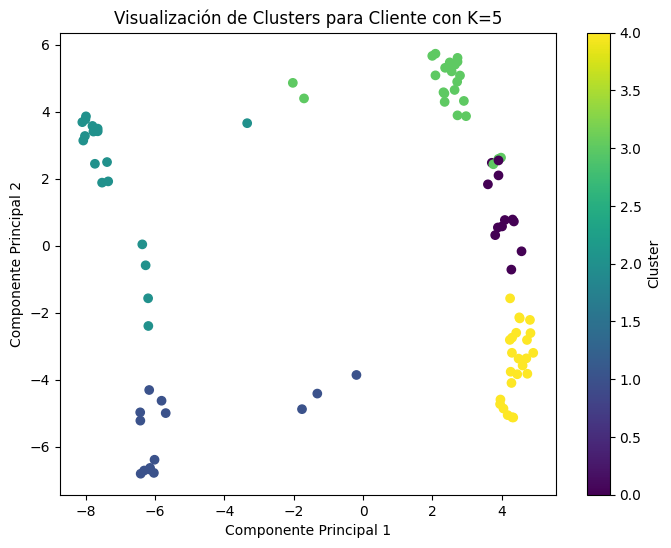

In [ ]:
from sklearn.preprocessing import StandardScaler # Importa la biblioteca para escalar datos
from sklearn.cluster import KMeans # Importa la biblioteca para clustering K-Means
from sklearn.decomposition import PCA # Importa la biblioteca para reducción de dimensionalidad
from sklearn.metrics import silhouette_score  # Importa la biblioteca para evaluar la calidad del clustering
import warnings # Importa la biblioteca para manejar advertencias

warnings.filterwarnings("ignore", category=FutureWarning) # Ignora las advertencias de tipo FutureWarning

hoja_data = hojas['Dataset 0']

codigo_productos = hoja_producto[['Código']].copy()

info_cliente = hoja_cliente[['Nombre Clientes', 'Moda 1', 'Moda 2', 'Moda 3']].copy()

Frecuencia = hoja_cliente[['Frecuencia de Compras']].copy()

# Define las columnas relevantes para cada hoja
columnas_producto = ['Año del producto', 'Precio', 'Escala']
columnas_cliente = ['Frecuencia de Compras', 'Total De Ventas', 'Ventas Promedio', 'Cantidad Promedio', 'Tiempo Promedio entre compras [Dias]', 'Numero de Productos distintos']

# Convierte las columnas relevantes a tipo numérico (float)
# Reemplaza las comas por espacios vacíos y luego convierte a float
for columna in columnas_cliente:
    hoja_cliente[columna] = hoja_cliente[columna].replace(',', '', regex=True).astype(float)
for columna in columnas_producto:
    hoja_producto[columna] = hoja_producto[columna].replace(',', '', regex=True).astype(float)

# Escala las columnas numéricas de las hojas 'Producto' y 'Cliente' usando StandardScaler
scaler = StandardScaler()
hoja_producto[columnas_producto] = scaler.fit_transform(hoja_producto[columnas_producto])
hoja_cliente[columnas_cliente] = scaler.fit_transform(hoja_cliente[columnas_cliente])


model = SentenceTransformer('paraphrase-MiniLM-L6-v2') # Carga el modelo SentenceTransformer para generar embeddings
columnas_categoricas_producto = ['Categoría', 'SubCategoria', 'Materiales', 'Color primario', 'Color secundario']
columnas_categoricas_cliente = ['Ciudad', 'Pais', 'Categoria Promedio']

# Define una función para generar embeddings para columnas categóricas
def generar_embeddings(df, columnas):
    for columna in columnas:
        embeddings = model.encode(df[columna].astype(str).tolist())
        df[columna] = embeddings.tolist()

# Genera embeddings para las columnas categóricas de 'hoja_producto' y 'hoja_cliente'
generar_embeddings(hoja_producto, columnas_categoricas_producto)
generar_embeddings(hoja_cliente, columnas_categoricas_cliente)

# Define una función para expandir los embeddings en columnas separadas
def expandir_embeddings(df, columnas_embeddings):
    for columna in columnas_embeddings:
        embeddings = pd.DataFrame(df[columna].tolist(), index=df.index)
        embeddings.columns = [f"{columna}_dim{i}" for i in range(embeddings.shape[1])]  # Asigna nombres de columna a las nuevas columnas de embeddings
        df = df.drop(columns=[columna]).join(embeddings) # Elimina la columna original de embeddings y une el DataFrame de embeddings expandido
    return df

# Expande los embeddings en las hojas 'Producto' y 'Cliente'
hoja_producto = expandir_embeddings(hoja_producto, columnas_categoricas_producto)
hoja_cliente = expandir_embeddings(hoja_cliente, columnas_categoricas_cliente)

# Elimina columnas innecesarias de las hojas 'Producto' y 'Cliente'
hoja_producto = hoja_producto.drop(columns=['Código', 'Nombre del Producto'], errors='ignore')
hoja_cliente = hoja_cliente.drop(columns=['Nombre Clientes', 'Moda 1', 'Moda 2', 'Moda 3'], errors='ignore')

# Define una función para aplicar el método del codo y el análisis de silueta
def metodo_codo_silueta(datos, nombre):
    inercia = [] # Lista para almacenar los valores de inercia
    silhouette_avgs = [] # Lista para almacenar los valores del coeficiente de silueta
    k_vals = range(2,11)   # Rango de valores para k (número de clusters)

    for k in k_vals:
        kmeans = KMeans(n_clusters=k, random_state=42)  # Crea un modelo KMeans con k clusters y un estado aleatorio fijo
        etiquetas = kmeans.fit_predict(datos) # Ajusta el modelo a los datos y obtiene las etiquetas de los clusters
        inercia.append(kmeans.inertia_) # Agrega la inercia del modelo a la lista 'inercia'
        silhouette_avgs.append(silhouette_score(datos, etiquetas)) # Agrega el coeficiente de silueta a la lista 'silhouette_avgs'


    plt.figure(figsize=(12, 5)) # Crea una figura para los gráficos
    plt.subplot(1, 2, 1) # Crea un subplot para el método del codo
    plt.plot(k_vals, inercia, 'bo-', markersize=8) # Grafica la inercia vs. k
    # Agrega etiquetas y título al gráfico
    plt.xlabel("Número de Clusters K")
    plt.ylabel("Inercia")
    plt.title(f"Método del Codo para {nombre}")

    plt.subplot(1, 2, 2) # Crea un subplot para el análisis de silueta
    plt.plot(k_vals, silhouette_avgs, 'ro-', markersize=8) # Grafica el coeficiente de silueta promedio vs. k
    # Agrega etiquetas y título al gráfico
    plt.xlabel("Número de Clusters K")
    plt.ylabel("Coeficiente Promedio de Silueta")
    plt.title(f"Análisis de Silueta para {nombre}")
    plt.tight_layout() # Ajusta el espaciado entre los subplots
    plt.show() # Muestra la figura con ambos subplots


def visualizar_clusters(datos, nombre, k): # Define una función para visualizar los clusters usando PCA
    kmeans = KMeans(n_clusters=k, random_state=42) # Crea un modelo KMeans con k clusters y un estado aleatorio fijo
    etiquetas = kmeans.fit_predict(datos) # Ajusta el modelo a los datos y obtiene las etiquetas de los clusters
    pca = PCA(n_components=2) # Crea un objeto PCA para reducir la dimensionalidad a 2 componentes
    datos_2d = pca.fit_transform(datos) # Aplica PCA a los datos para obtener una representación en 2D

    plt.figure(figsize=(8, 6)) # Crea una figura para el gráfico
    scatter = plt.scatter(datos_2d[:, 0], datos_2d[:, 1], c=etiquetas, cmap='viridis', marker='o') # Crea un gráfico de dispersión de los datos en 2D, coloreando los puntos por cluster
    plt.colorbar(scatter, label='Cluster') # Agrega una barra de color para los clusters
    # Agrega etiquetas y título al gráfico
    plt.title(f"Visualización de Clusters para {nombre} con K={k}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show() # Muestra el gráfico

# Análisis de clustering para productos
print("Análisis de Producto:")
metodo_codo_silueta(hoja_producto, "Producto") # Aplica el método del codo y silueta a los datos de productos
print("Visualización de Clusters para Producto:")
visualizar_clusters(hoja_producto, "Producto", k=7) # Visualiza los clusters de productos con k=7

# Análisis de clustering para clientes
print("Análisis de Cliente:")
metodo_codo_silueta(hoja_cliente, "Cliente") # Aplica el método del codo y silueta a los datos de clientes
print("Visualización de Clusters para Cliente:")
visualizar_clusters(hoja_cliente, "Cliente", k=5) # Visualiza los clusters de clientes con k=5


Este codigo toma datos de texto de las hojas "Producto" y "Cliente", seleccionando las columnas mas relevantes y convirtiendolas a valores numericos, para luego normalizar los datos.

Posteriormente, se utilizo Embeddings (modelo SentenceTransformer), para convertir valores categoricos en vectores numericos, para luego descomponerlos en columnas e integrarlas al dataset, tambien se eliminan las columnas inecesarias para el analisis.

Se aplica el algoritmo k-means, calculando a su vez, la distancia dentro de los clusters y la separacion entre estos, para luego graficar usando el metodo del codo y analisis de silueta. Se utiliza PCA para reducir las dimensiones y poder visualizar los clusters. Se aplica k=7 y k=5

Resultados:

Aunque el método de la silueta confirma los resultados obtenidos con el método del codo (dos clusters para clientes y cuatro clusters para productos), en el análisis de componentes principales (PCA) de los clusters observamos un problema significativo: no se cumplen algunos de los supuestos previamente mencionados. En el caso de los clientes, los clusters no presentan una forma esférica clara, mientras que en los productos existe una mezcla de tamaños desiguales y concentraciones ligeramente distintas. Para superar estas limitaciones del método k-means, se decidió aumentar el número de clusters. Se realizó un ajuste visual, encontrando que cinco clusters para clientes y siete para productos proporcionaban una mejor representación, lo cual concuerda con la visualización del método de sombra, en el que esta combinación aparece como la segunda mejor opción.


No satisfechos con los resultados iniciales, decidimos explorar el clustering jerárquico aglomerativo, una técnica que organiza los datos en una estructura jerárquica mediante agrupación progresiva de puntos cercanos o división de grupos generales en clusters más específicos. Para nuestro análisis, emplearemos el método de Ward, el cual minimiza la varianza dentro de los clusters en cada paso, formando grupos compactos y bien diferenciados. Este método es eficaz para datos con clusters de diferentes tamaños y formas moderadamente variables, ya que produce agrupaciones coherentes y fácilmente interpretables en ambos conjuntos de datos.

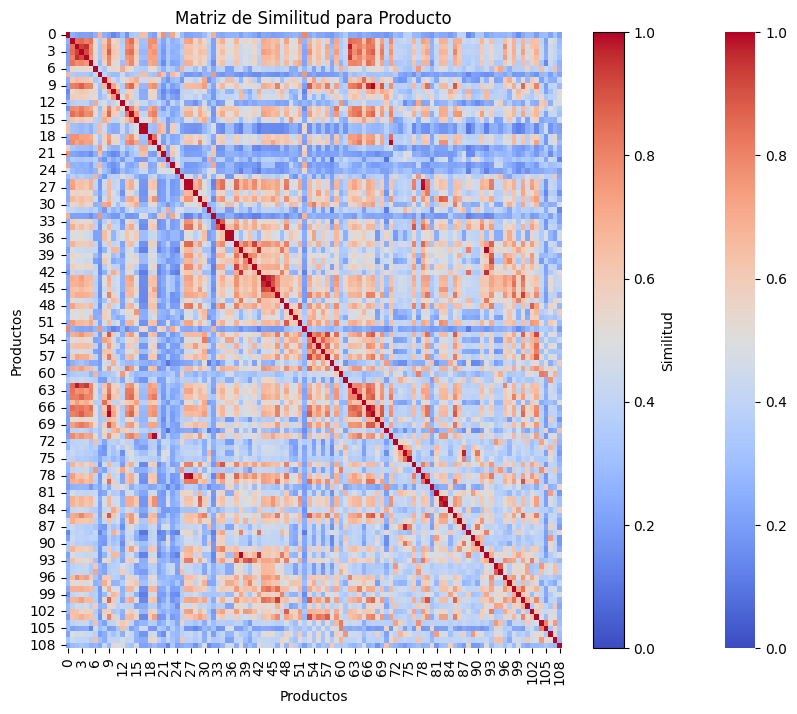

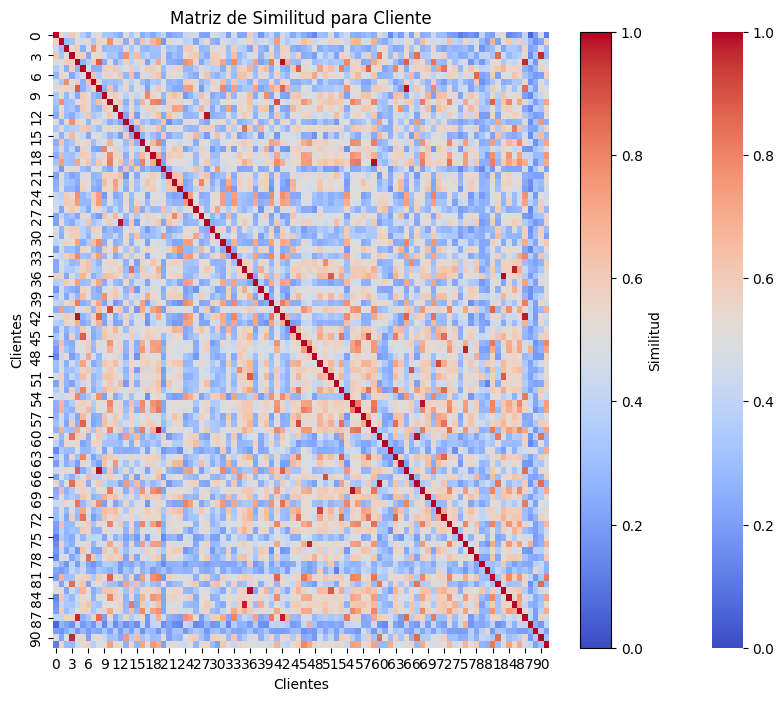

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity # Importa la función cosine_similarity para calcular la similitud del coseno

# Calcula la matriz de similitud para productos y clientes
similarity_matrix_producto = cosine_similarity(hoja_producto)
similarity_matrix_cliente = cosine_similarity(hoja_cliente)

# Crea un mapa de calor para la matriz de similitud de productos
plt.figure(figsize=(10, 8))
ax = sns.heatmap(similarity_matrix_producto, cmap='coolwarm', vmin=0, vmax=1) # Crea mapas de calor que visualizan las matrices de similitud.
ax.set_title("Matriz de Similitud para Producto")
ax.set_xlabel("Productos")
ax.set_ylabel("Productos")
plt.colorbar(ax.collections[0], label="Similitud")
plt.show()

# Crea un mapa de calor para la matriz de similitud de clientes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(similarity_matrix_cliente, cmap='coolwarm', vmin=0, vmax=1) # Crea mapas de calor que visualizan las matrices de similitud.
ax.set_title("Matriz de Similitud para Cliente")
ax.set_xlabel("Clientes")
ax.set_ylabel("Clientes")
plt.colorbar(ax.collections[0], label="Similitud")
plt.show()

Se calcula la matriz de similitud de coseno para medir la similitud entre la direccion de dos vectores, realizado para producto y cliente. Luego se realizan mapas de calor para producto y cliente.

Esto se realiza para luego, comparar los resultados que se generen con k-means y con clustering jerarquico aglomerativo

Dendrograma de la hoja Producto:


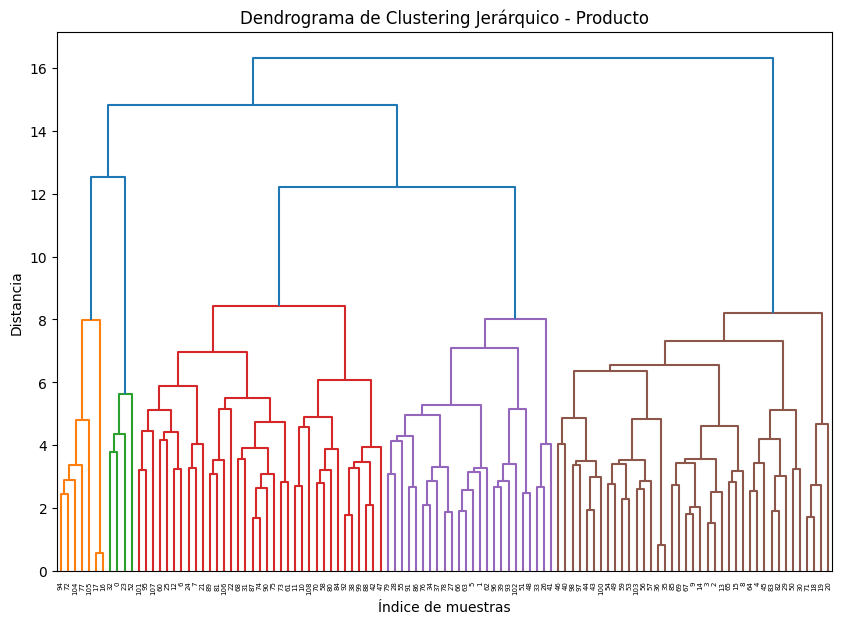

Datos utilizados para el dendrograma de Producto:
   Año del producto    Precio    Escala  Logos Originales  Categoría_dim0  \
0         -3.108934 -0.613969  0.057762                 0       -0.443528   
1         -0.395172 -1.232773 -0.163151                 0       -0.473893   
2          0.355443 -0.062963 -0.356449                 0       -0.423481   
3          0.605648  0.121323 -0.356449                 0       -0.423481   
4          0.913593  2.012249 -0.273607                 0       -0.423481   

   Categoría_dim1  Categoría_dim2  Categoría_dim3  Categoría_dim4  \
0       -0.001321        0.369732        0.105392       -0.286371   
1        0.023925        0.265154        0.124625       -0.067985   
2        0.245138        0.077838        0.195329       -0.307643   
3        0.245138        0.077838        0.195329       -0.307643   
4        0.245138        0.077838        0.195329       -0.307643   

   Categoría_dim5  ...  Color secundario_dim374  Color secundario_dim375

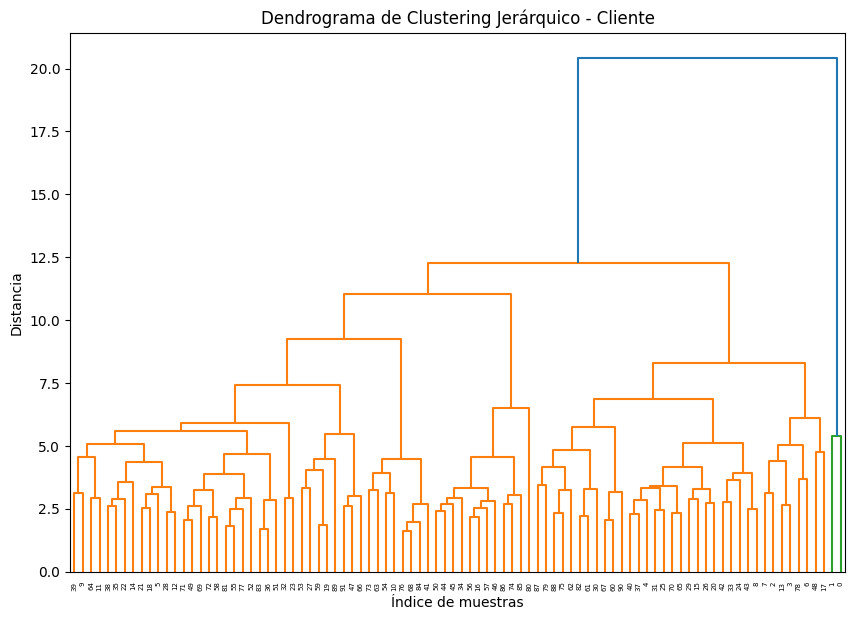

Datos utilizados para el dendrograma de Cliente:
   Frecuencia de Compras  Total De Ventas  Ventas Promedio  Cantidad Promedio  \
0               7.421043         7.321687        -0.078107           0.403486   
1               4.853266         4.975119         0.233463           0.139487   
2               0.497798         0.387582        -0.690181          -0.095637   
3               0.725323         0.647855        -0.411376          -0.190512   
4               0.595309         0.501508        -0.546579          -0.718510   

   Tiempo Promedio entre compras [Dias]  Numero de Productos distintos  \
0                              1.084124                       5.917975   
1                              1.266135                       3.779103   
2                             -0.130607                       1.345213   
3                             -0.304510                       1.271459   
4                              0.395500                       1.123950   

   Ciudad_dim0  Ciu

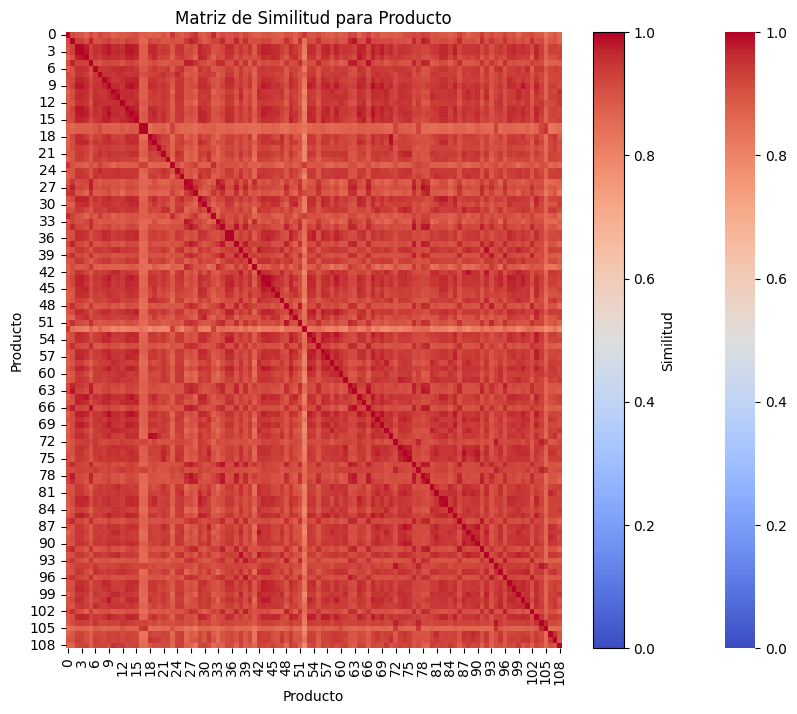

Matriz de Similitud para Clientes


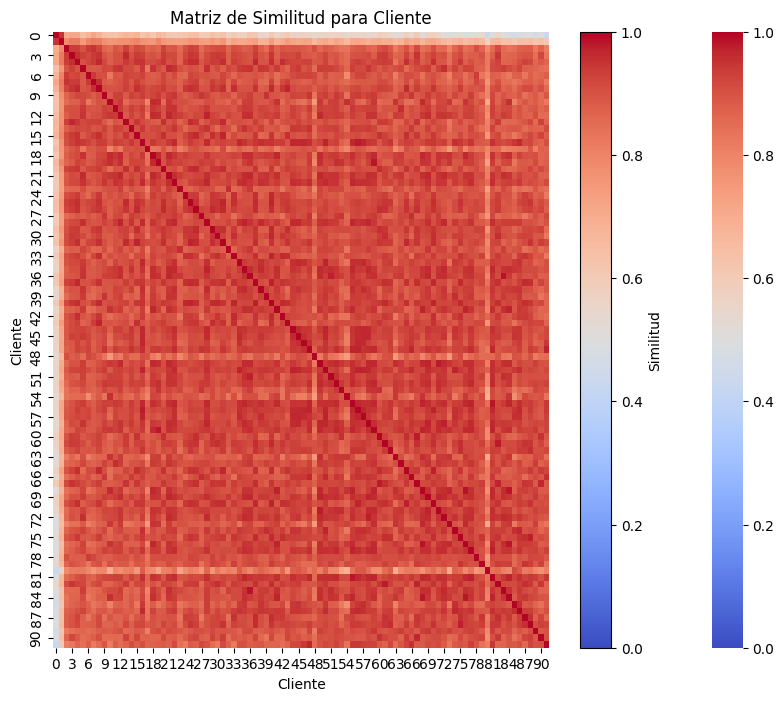

In [ ]:
from sklearn.cluster import AgglomerativeClustering  # Importa el modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage  # Importa funciones para dendrogramas y clustering jerárquico
import warnings  # Importa la biblioteca para manejar advertencias

warnings.filterwarnings("ignore", category=FutureWarning)  # Ignora advertencias de tipo FutureWarning

hoja_producto = hojas['Producto'] # Obtiene las hojas específicas de "Producto" y "Cliente"
hoja_cliente = hojas['Cliente']

hoja_data = hojas['Dataset 0']

codigo_productos = hoja_producto[['Código']].copy()

info_cliente = hoja_cliente[['Nombre Clientes', 'Moda 1', 'Moda 2', 'Moda 3']].copy()

Frecuencia = hoja_cliente[['Frecuencia de Compras']].copy()


columnas_producto = ['Año del producto', 'Precio', 'Escala'] # Define las columnas relevantes para análisis en cada hoja
columnas_cliente = [
    'Frecuencia de Compras', 'Total De Ventas', 'Ventas Promedio',
    'Cantidad Promedio', 'Tiempo Promedio entre compras [Dias]', 'Numero de Productos distintos'
]

for columna in columnas_cliente: # Convierte las columnas de cliente a tipo numérico (float), eliminando comas si las hay
    hoja_cliente[columna] = hoja_cliente[columna].replace(',', '', regex=True).astype(float)

for columna in columnas_producto: # Convierte las columnas de producto a tipo numérico (float), eliminando comas si las hay
    hoja_producto[columna] = hoja_producto[columna].replace(',', '', regex=True).astype(float)

scaler = StandardScaler() # Escala las columnas numéricas para estandarizarlas
hoja_producto[columnas_producto] = scaler.fit_transform(hoja_producto[columnas_producto])
hoja_cliente[columnas_cliente] = scaler.fit_transform(hoja_cliente[columnas_cliente])

model = SentenceTransformer('paraphrase-MiniLM-L6-v2') # Carga un modelo de embeddings para generar vectores numéricos de texto

columnas_categoricas_producto = ['Categoría', 'SubCategoria', 'Materiales', 'Color primario', 'Color secundario'] # Define las columnas categóricas que serán transformadas en embeddings
columnas_categoricas_cliente = ['Ciudad', 'Pais', 'Categoria Promedio']

def generar_embeddings(df, columnas): # Función para convertir texto categórico en embeddings
    for columna in columnas:
        embeddings = model.encode(df[columna].astype(str).tolist())  # Genera embeddings para cada valor categórico
        df[columna] = embeddings.tolist()  # Reemplaza la columna original con los embeddings

generar_embeddings(hoja_producto, columnas_categoricas_producto) # Genera embeddings para columnas categóricas de productos y clientes
generar_embeddings(hoja_cliente, columnas_categoricas_cliente)

def expandir_embeddings(df, columnas_embeddings): # Expande los embeddings en columnas separadas para integrarlas al dataframe
    for columna in columnas_embeddings:
        embeddings = pd.DataFrame(df[columna].tolist(), index=df.index)  # Convierte embeddings en columnas separadas
        embeddings.columns = [f"{columna}_dim{i}" for i in range(embeddings.shape[1])]  # Asigna nombres a las columnas
        df = df.drop(columns=[columna]).join(embeddings)  # Reemplaza la columna original con las nuevas
    return df

# Aplica la expansión de embeddings para productos y clientes
hoja_producto = expandir_embeddings(hoja_producto, columnas_categoricas_producto)
hoja_cliente = expandir_embeddings(hoja_cliente, columnas_categoricas_cliente)

hoja_producto = hoja_producto.drop(columns=['Código', 'Nombre del Producto'], errors='ignore') # Elimina columnas irrelevantes que no son necesarias para el análisis
hoja_cliente = hoja_cliente.drop(columns=['Nombre Clientes', 'Moda 1', 'Moda 2', 'Moda 3'], errors='ignore')

# Función para crear y visualizar un dendrograma
def generar_dendrograma(df, nombre_hoja, method='ward'):
    linked = linkage(df, method=method)  # Calcula las distancias para el clustering jerárquico
    plt.figure(figsize=(10, 7))  # Configura el tamaño de la figura
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)  # Genera el dendrograma
    plt.title(f"Dendrograma de Clustering Jerárquico - {nombre_hoja}")
    plt.xlabel("Índice de muestras")
    plt.ylabel("Distancia")
    plt.show()  # Muestra el dendrograma
    print(f"Datos utilizados para el dendrograma de {nombre_hoja}:")
    print(df.head())

# Función para aplicar clustering jerárquico y generar clusters
def clustering_jerarquico(df, nombre_hoja, distance_threshold=None, method='ward'):
    print(f"Dendrograma de la hoja {nombre_hoja}:")
    generar_dendrograma(df, nombre_hoja, method=method)  # Usa la función para generar un dendrograma

    # Aplica el clustering jerárquico
    cluster_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=distance_threshold,  # Define el umbral de distancia para cortar el dendrograma
        metric='euclidean',
        linkage=method
    )
    etiquetas = cluster_model.fit_predict(df)  # Calcula los clusters
    df['Cluster'] = etiquetas  # Agrega una nueva columna con los clusters asignados
    return df

# Aplica clustering jerárquico para productos y clientes
hoja_producto_cluster = clustering_jerarquico(hoja_producto, 'Producto', distance_threshold=10, method='ward')
hoja_cliente_cluster = clustering_jerarquico(hoja_cliente, 'Cliente', distance_threshold=10, method='ward')

# Muestra el número de elementos en cada cluster para productos
print("Clusters en la hoja de Producto:")
print(hoja_producto_cluster['Cluster'].value_counts())

# Muestra el número de elementos en cada cluster para clientes
print("Clusters en la hoja de Cliente:")
print(hoja_cliente_cluster['Cluster'].value_counts())

# Función para generar una matriz de similitud y visualizarla como mapa de calor
def generar_matriz_similitud(df, nombre_hoja):
    matriz_similitud = cosine_similarity(df)  # Calcula la matriz de similitud del coseno

    # Genera un mapa de calor para visualizar la matriz de similitud
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(matriz_similitud, cmap='coolwarm', vmin=0, vmax=1)
    ax.set_title(f"Matriz de Similitud para {nombre_hoja}")
    ax.set_xlabel(f"{nombre_hoja}")
    ax.set_ylabel(f"{nombre_hoja}")
    plt.colorbar(ax.collections[0], label="Similitud")
    plt.show()  # Muestra el mapa de calor

    return matriz_similitud

# Genera y muestra la matriz de similitud para productos
print("Matriz de Similitud para Productos")
matriz_similitud_producto = generar_matriz_similitud(hoja_producto, "Producto")

# Genera y muestra la matriz de similitud para clientes
print("Matriz de Similitud para Clientes")
matriz_similitud_cliente = generar_matriz_similitud(hoja_cliente, "Cliente")



Similar al clustering, se cargan los datos de las hojas "Producto" y "Cliente" y luego se convierten las columnas a vectores numericos, tambien se utiliza Embeddings, para posteriormente eliminar las columnas no numericas para su analisis.

Se genera un dendrograma que organiza las muestras segun sus similitudes, para luego aplicar clustering jerarquico y asi mostrar los resultados en la imagen, finalmente se realiza la matriz de similitud para medir la relacion entre filas del dataset, todo esto mediante mapas de calor.

Resultados:

Como se observa en las matrices, se opta por el clustering jerárquico, ya que proporciona una definición de los datos más precisa en comparación con el método k-means.

In [ ]:

def recomendar_productos_por_cluster(df, codigo_productos, producto_input, top_n=5): # Función para recomendar productos por cluster

    if producto_input not in codigo_productos['Código'].values: # Verifica si el producto existe en el DataFrame de códigos
        print(f"Producto {producto_input} no encontrado en el DataFrame de códigos.")
        return [] # Retorna una lista vacía si no se encuentra el producto


    idx_producto_input = codigo_productos.index[codigo_productos['Código'] == producto_input].item() # Obtiene el índice del producto en el DataFrame

    if 'Cluster' not in df.columns: # Verifica si la columna 'Cluster' existe en el DataFrame
        print("La columna 'Cluster' no existe en el DataFrame de productos.")
        return []

    cluster_producto = df.loc[idx_producto_input, 'Cluster'] # Obtiene el cluster del producto
    print(f"Cluster del producto {producto_input}: {cluster_producto}")

    productos_mismo_cluster = df[df['Cluster'] == cluster_producto].index # Obtiene los productos en el mismo cluster
    print(f"Productos en el mismo cluster: {productos_mismo_cluster.tolist()}")

    if len(productos_mismo_cluster) <= 1: # Verifica si hay otros productos en el mismo cluster
        print("No hay otros productos en el mismo cluster.")
        return []

    matriz_similitud = cosine_similarity(df.loc[productos_mismo_cluster]) # Calcula la matriz de similitud
    print(f"Matriz de similitud calculada para productos del cluster {cluster_producto}.")

    similitudes = matriz_similitud[productos_mismo_cluster.get_loc(idx_producto_input)] # Obtiene las similitudes del producto con otros productos en el mismo cluster
    indices_ordenados = np.argsort(-similitudes) # Ordena los productos por similitud en orden descendente

    indices_recomendados = [ # Obtiene los índices de los productos recomendados
        productos_mismo_cluster[i] for i in indices_ordenados if productos_mismo_cluster[i] != idx_producto_input
    ][:top_n]

    print(f"Índices de productos recomendados: {indices_recomendados}")
    return codigo_productos.loc[indices_recomendados, 'Código'].tolist() # Retorna los códigos de los productos recomendados



producto_input = "S12_1108" # Llama a la función para obtener recomendaciones de productos
recomendaciones_producto = recomendar_productos_por_cluster(hoja_producto, codigo_productos, producto_input, top_n=5)
print(f"Recomendaciones para el producto {producto_input}: {recomendaciones_producto}")


def recomendar_productos_por_cliente_cluster(df_clientes, info_cliente, cliente_input, top_n=5): # Función para recomendar productos por cluster de cliente
    # Verificar si el cliente existe
    if cliente_input not in info_cliente['Nombre Clientes'].values:
        print(f"Cliente '{cliente_input}' no encontrado en la información proporcionada.")
        return []

    # Obtener el índice del cliente
    idx_cliente = info_cliente.index[info_cliente['Nombre Clientes'] == cliente_input].item()

    # Verificar si la columna 'Cluster' existe en df_clientes
    if 'Cluster' not in df_clientes.columns:
        print("La columna 'Cluster' no existe en el DataFrame de clientes.")
        return []

    # Obtener el clúster del cliente
    cluster_cliente = df_clientes.loc[idx_cliente, 'Cluster']
    print(f"Cluster del cliente '{cliente_input}': {cluster_cliente}")

    # Obtener los clientes en el mismo clúster
    clientes_mismo_cluster = df_clientes[df_clientes['Cluster'] == cluster_cliente].index
    print(f"Clientes en el mismo cluster: {clientes_mismo_cluster.tolist()}")

    # Obtener los productos populares del clúster
    modas_cluster = info_cliente.loc[clientes_mismo_cluster, ['Moda 1', 'Moda 2', 'Moda 3']].values.flatten()

    # Calcular la frecuencia de cada producto
    modas_frecuencia = pd.Series(modas_cluster).value_counts()

    # Obtener los productos que ya consume el cliente
    modas_cliente = info_cliente.loc[idx_cliente, ['Moda 1', 'Moda 2', 'Moda 3']].values.flatten()

    # Recomendaciones basadas en los productos más populares en el clúster,
    # excluyendo aquellos que el cliente ya consume
    recomendaciones = [producto for producto in modas_frecuencia.index if producto not in modas_cliente][:top_n]

    print(f"Recomendaciones para el cliente '{cliente_input}': {recomendaciones}")
    return recomendaciones

cliente_input = "Clover Collections, Co." # Llama a la función para obtener recomendaciones de productos por cluster de cliente

recomendaciones_cliente = recomendar_productos_por_cliente_cluster(
    hoja_cliente_cluster,  # DataFrame con información de los clientes y sus clusters
    info_cliente,  # DataFrame con información adicional de los clientes
    cliente_input,  # Nombre del cliente para el que se buscan recomendaciones
    top_n=5  # Número máximo de recomendaciones a generar
)


def fusionar_recomendaciones( # Función para fusionar las recomendaciones de productos y de cluster de cliente
    recomendaciones_producto,  # Lista de recomendaciones basadas en el producto
    recomendaciones_cliente,  # Lista de recomendaciones basadas en el cluster del cliente
    frecuencia_compra,  # Frecuencia de compra del cliente
    umbral_frecuencia=15,  # Umbral de frecuencia para determinar la prioridad de las recomendaciones
    top_n=10  # Número máximo de recomendaciones finales a generar
):

    if frecuencia_compra < umbral_frecuencia:  # Determina la prioridad de las recomendaciones según la frecuencia de compra
        prioridad = recomendaciones_producto # Prioriza las recomendaciones basadas en el producto si la frecuencia es baja
        secundaria = recomendaciones_cliente # Las recomendaciones basadas en el cluster del cliente son secundarias
    else:
        prioridad = recomendaciones_cliente # Prioriza las recomendaciones basadas en el cluster del cliente si la frecuencia es alta
        secundaria = recomendaciones_producto # Las recomendaciones basadas en el producto son secundarias


    recomendaciones_finales = [] # Fusiona las recomendaciones, evitando duplicados
    for lista in [prioridad, secundaria]: # Itera sobre las listas de recomendaciones, priorizando la primera
        for item in lista: # Itera sobre los elementos de cada lista
            if item not in recomendaciones_finales: # Si el elemento no está ya en la lista final
                recomendaciones_finales.append(item) # Lo agrega a la lista final

    return recomendaciones_finales[:top_n] # Retorna las recomendaciones finales, limitando el número a top_n

frecuencia_compra_cliente = Frecuencia.loc[ # Obtiene la frecuencia de compra del cliente
    info_cliente['Nombre Clientes'] == cliente_input, # Filtra por el nombre del cliente
    'Frecuencia de Compras' # Selecciona la columna de frecuencia de compras
].item() # Obtiene el valor de la frecuencia de compra como un escalar

recomendaciones_fusionadas = fusionar_recomendaciones( # Llama a la función fusionar_recomendaciones para obtener las recomendaciones finales
    recomendaciones_producto=recomendaciones_producto,  # Lista de recomendaciones por producto
    recomendaciones_cliente=recomendaciones_cliente, # Lista de recomendaciones por cluster de cliente
    frecuencia_compra=frecuencia_compra_cliente, # Frecuencia de compra del cliente
    umbral_frecuencia=15, # Umbral de frecuencia para determinar la prioridad
    top_n=10  # Número máximo de recomendaciones finales
)

print(f"Recomendaciones finales para el cliente '{cliente_input}': {recomendaciones_fusionadas}") # Imprime las recomendaciones finales para el cliente

Cluster del producto S12_1108: 1
Productos en el mismo cluster: [2, 3, 4, 8, 9, 13, 14, 15, 18, 19, 20, 29, 30, 35, 36, 40, 43, 44, 45, 46, 49, 50, 53, 54, 56, 57, 59, 64, 65, 67, 69, 71, 82, 83, 85, 97, 98, 100, 103]
Matriz de similitud calculada para productos del cluster 1.
Índices de productos recomendados: [67, 85, 9, 3, 13]
Recomendaciones para el producto S12_1108: ['S24_3432', 'S18_3232', 'S10_4962', 'S24_2972', 'S24_4048']
Cluster del cliente 'Clover Collections, Co.': 1
Clientes en el mismo cluster: [16, 34, 44, 45, 46, 50, 56, 57, 74, 80, 85, 86]
Recomendaciones para el cliente 'Clover Collections, Co.': ['S10_4757', 'S10_1949', 'S18_3029', 'S18_1662', 'S10_4962']
Recomendaciones finales para el cliente 'Clover Collections, Co.': ['S24_3432', 'S18_3232', 'S10_4962', 'S24_2972', 'S24_4048', 'S10_4757', 'S10_1949', 'S18_3029', 'S18_1662']


Se realiza la recomendación, una por cada clustering (es decir, por cliente y por producto), para el primero se utiliza las modas como referencia y en el segundo se utiliza el codigo del producto, se utilizan ejemplos para validar el funcionamiento.

Para aumentar la precisión se opto por listar 10 recomendaciones